## Diabeties Detection

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
from imblearn.combine import SMOTEENN
wn.filterwarnings('ignore')

In [181]:
df = pd.read_csv('diabetes-prediction-dataset_.csv')
df.head()

,Age,HighBP,HighChol,Smoker,Sex,BMI,blood_glucose_level,Insulin,HbA1c_level,Diabetes_binary
0,10.0,1.0,1.0,1.0,1.0,31.0,200.0,627.590220,5.7,1.0
1,12.0,1.0,1.0,1.0,0.0,36.0,126.0,96.784472,6.6,0.0
2,3.0,0.0,0.0,0.0,1.0,29.0,200.0,95.155065,6.0,0.0
3,9.0,1.0,1.0,1.0,1.0,27.0,260.0,433.186030,7.5,1.0
4,11.0,0.0,0.0,0.0,0.0,20.0,160.0,100.597665,6.5,0.0


In [183]:
df['Insulin'] = df['Insulin'] + 0.0001

In [184]:
df

,Age,HighBP,HighChol,Smoker,Sex,BMI,blood_glucose_level,Insulin,HbA1c_level,Diabetes_binary
0,10.0,1.0,1.0,1.0,1.0,31.0,200.0,627.590320,5.7,1.0
1,12.0,1.0,1.0,1.0,0.0,36.0,126.0,96.784572,6.6,0.0
2,3.0,0.0,0.0,0.0,1.0,29.0,200.0,95.155165,6.0,0.0
3,9.0,1.0,1.0,1.0,1.0,27.0,260.0,433.186130,7.5,1.0
4,11.0,0.0,0.0,0.0,0.0,20.0,160.0,100.597765,6.5,0.0
...,...,...,...,...,...,...,...,...,...,...
17995,12.0,1.0,1.0,1.0,1.0,26.0,158.0,179.786496,5.8,0.0
17996,7.0,0.0,0.0,0.0,0.0,34.0,160.0,0.000100,5.8,0.0
17997,4.0,0.0,0.0,0.0,0.0,36.0,158.0,113.723629,5.8,0.0
17998,10.0,0.0,0.0,1.0,0.0,22.0,130.0,176.553400,6.6,0.0


In [185]:
import pandas as pd

# Assuming new_df is your DataFrame
new_df = df.copy()
# Mapping values to labels
label_mapping = {1: "Yes", 0: "No"}
sex_mapping = {1: "Male", 0: "Female"}

# Mapping age categories based on _AGEG5YR codebook
age_mapping = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39",
    5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59",
    9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79",
    13: "80 or older"
}

# Apply mapping to all columns except 'Sex' and 'Age'
for col in new_df.columns:
    if col not in ["Sex", "Age"]:
        new_df[col] = new_df[col].replace(label_mapping)

# Apply mapping to 'Sex' column
new_df["Sex"] = new_df["Sex"].replace(sex_mapping)

# Apply mapping to 'Age' column
new_df["Age"] = new_df["Age"].replace(age_mapping)

In [186]:
new_df.head()

,Age,HighBP,HighChol,Smoker,Sex,BMI,blood_glucose_level,Insulin,HbA1c_level,Diabetes_binary
0,65-69,Yes,Yes,Yes,Male,31.0,200.0,627.590320,5.7,Yes
1,75-79,Yes,Yes,Yes,Female,36.0,126.0,96.784572,6.6,No
2,30-34,No,No,No,Male,29.0,200.0,95.155165,6.0,No
3,60-64,Yes,Yes,Yes,Male,27.0,260.0,433.186130,7.5,Yes
4,70-74,No,No,No,Female,20.0,160.0,100.597765,6.5,No


In [187]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  18000 non-null  object 
 1   HighBP               18000 non-null  object 
 2   HighChol             18000 non-null  object 
 3   Smoker               18000 non-null  object 
 4   Sex                  18000 non-null  object 
 5   BMI                  18000 non-null  float64
 6   blood_glucose_level  18000 non-null  float64
 7   Insulin              18000 non-null  float64
 8   HbA1c_level          18000 non-null  float64
 9   Diabetes_binary      18000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.4+ MB


## **Explanation:**
- The number **1** represents people aged **18-24 years**.
- The number **9** represents people aged **60-64 years**.
- The number **13** represents people aged **80 or older**.

### **Age Groups (_AGEG5YR):**

| Code | Age Range  |
|------|-----------|
| 1    | 18-24     |
| 2    | 25-29     |
| 3    | 30-34     |
| 4    | 35-39     |
| 5    | 40-44     |
| 6    | 45-49     |
| 7    | 50-54     |
| 8    | 55-59     |
| 9    | 60-64     |
| 10   | 65-69     |
| 11   | 70-74     |
| 12   | 75-79     |
| 13   | 80 or older |

This type of **age grouping** is often used in medical or survey datasets to make analysis easier, instead of using exact ages.  

In [217]:
new_df.head()

,Age,HighBP,HighChol,Smoker,Sex,BMI,blood_glucose_level,Insulin,HbA1c_level,Diabetes_binary
0,65-69,Yes,Yes,Yes,Male,31.0,200.0,627.590320,5.7,Yes
1,75-79,Yes,Yes,Yes,Female,36.0,126.0,96.784572,6.6,No
2,30-34,No,No,No,Male,29.0,200.0,95.155165,6.0,No
3,60-64,Yes,Yes,Yes,Male,27.0,260.0,433.186130,7.5,Yes
4,70-74,No,No,No,Female,20.0,160.0,100.597765,6.5,No


In [218]:
new_df.to_csv('da

,Age,HighBP,HighChol,Smoker,Sex,BMI,blood_glucose_level,Insulin,HbA1c_level,Diabetes_binary
0,65-69,Yes,Yes,Yes,Male,31.0,200.0,627.590320,5.7,Yes
1,75-79,Yes,Yes,Yes,Female,36.0,126.0,96.784572,6.6,No
2,30-34,No,No,No,Male,29.0,200.0,95.155165,6.0,No
3,60-64,Yes,Yes,Yes,Male,27.0,260.0,433.186130,7.5,Yes
4,70-74,No,No,No,Female,20.0,160.0,100.597765,6.5,No
...,...,...,...,...,...,...,...,...,...,...
17995,75-79,Yes,Yes,Yes,Male,26.0,158.0,179.786496,5.8,No
17996,50-54,No,No,No,Female,34.0,160.0,0.000100,5.8,No
17997,35-39,No,No,No,Female,36.0,158.0,113.723629,5.8,No
17998,65-69,No,No,Yes,Female,22.0,130.0,176.553400,6.6,No


In [216]:
new_df['Insulin'].max(),new_df['Insulin'].min()

(846.0001, 0.0001)

<Axes: >

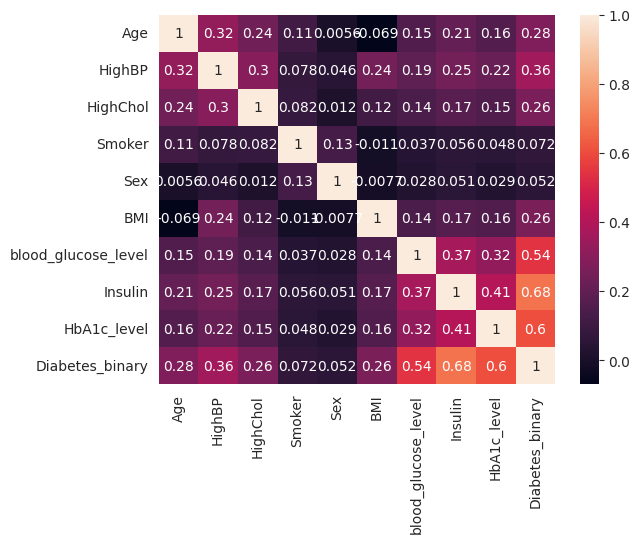

In [189]:
sns.heatmap(df.corr(), annot=True)

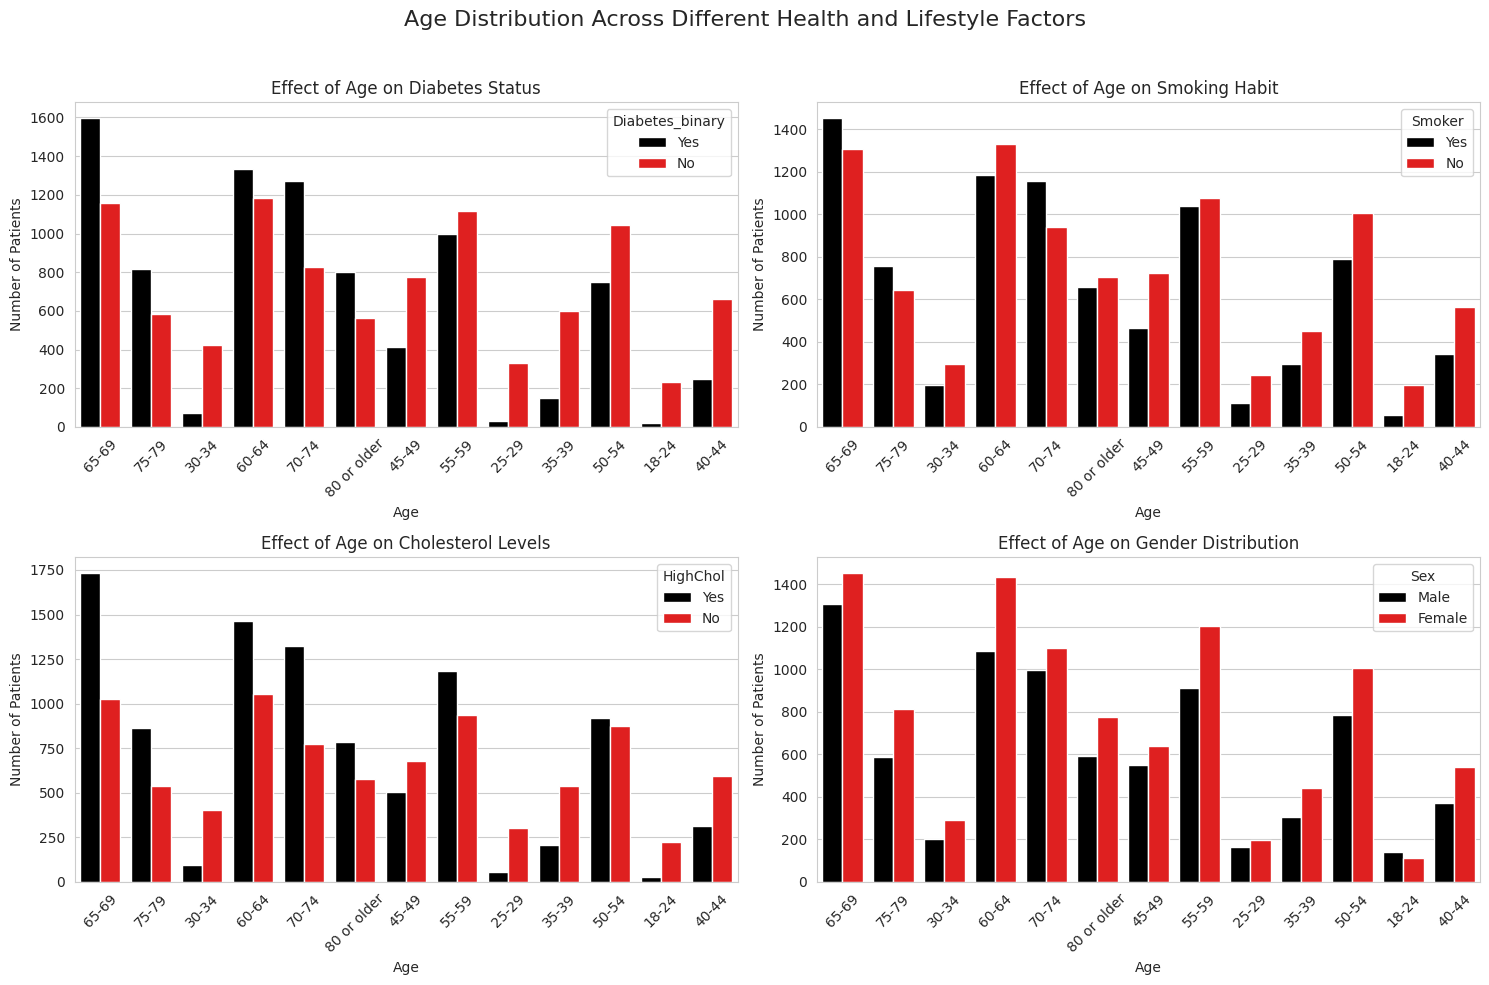

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style('whitegrid')

# Define hues and corresponding titles
hues = ['Diabetes_binary', 'Smoker', 'HighChol', 'Sex']
titles = [
    "Effect of Age on Diabetes Status",
    "Effect of Age on Smoking Habit",
    "Effect of Age on Cholesterol Levels",
    "Effect of Age on Gender Distribution"
]

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through hues and create countplots
for i, hue in enumerate(hues):
    sns.countplot(data=new_df, x='Age', hue=hue, palette=['black','red'], ax=axes[i])
    
    # Set labels and titles for each subplot
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Number of Patients")
    axes[i].set_title(titles[i], fontsize=12)  # Individual titles
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-ticks for better visibility
    axes[i].legend(title=hue)

# Add a main title
fig.suptitle("Age Distribution Across Different Health and Lifestyle Factors", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the main title

# Show the plot
plt.show()


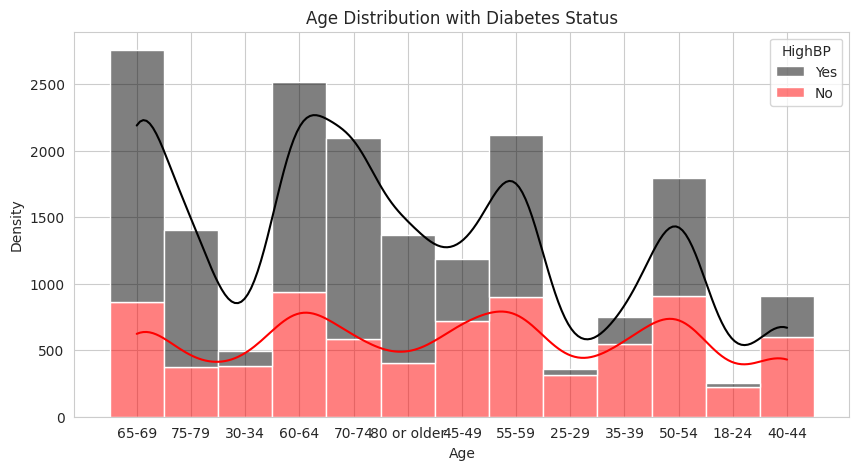

In [191]:
plt.figure(figsize=(10, 5))
sns.histplot(data=new_df, x='Age', hue='HighBP', kde=True, bins=20, palette=['black','red'], multiple='stack')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution with Diabetes Status")
plt.show()


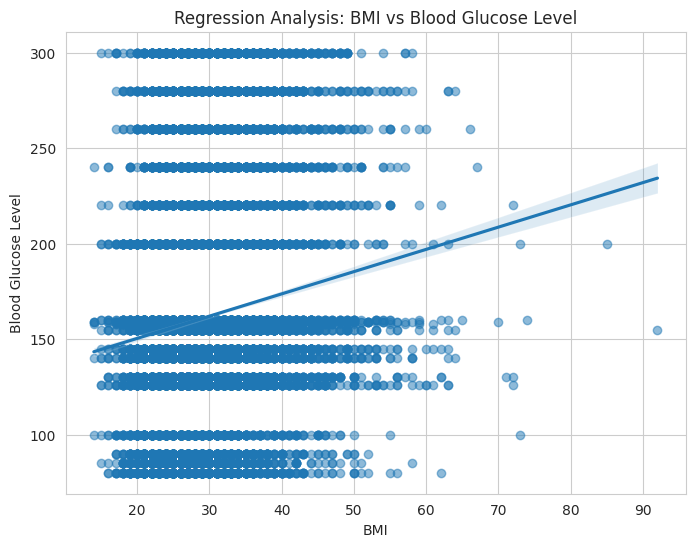

In [192]:
plt.figure(figsize=(8, 6))

# Regression plot
sns.regplot(x=new_df['BMI'], y=new_df['blood_glucose_level'], scatter_kws={'alpha':0.5})

plt.title("Regression Analysis: BMI vs Blood Glucose Level")
plt.xlabel("BMI")
plt.ylabel("Blood Glucose Level")

plt.show()


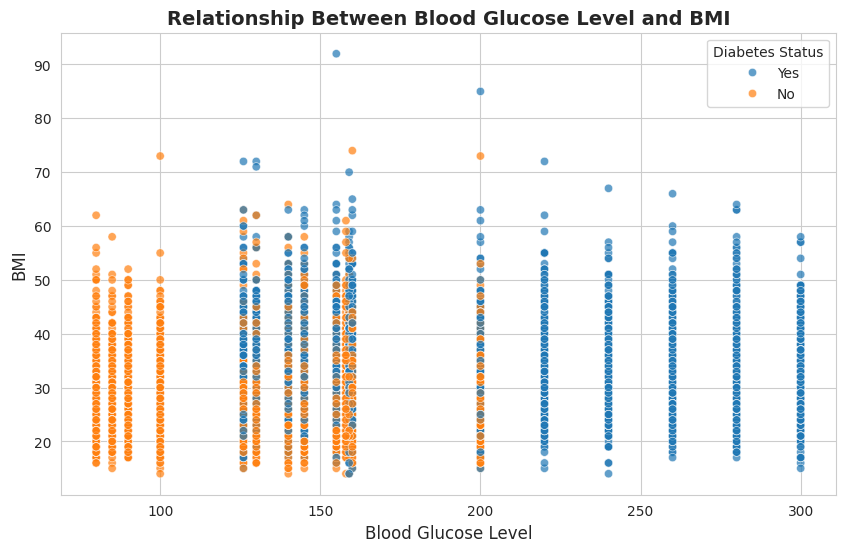

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style('whitegrid')

# Create figure
plt.figure(figsize=(10, 6))

# Plot scatter plot with better aesthetics
ax = sns.scatterplot(
    data=new_df, 
    x='blood_glucose_level', 
    y='BMI', 
    hue='Diabetes_binary', 
    alpha=0.7  # Adjust transparency for better visibility
)

# Set title and labels
plt.title("Relationship Between Blood Glucose Level and BMI", fontsize=14, fontweight='bold')
plt.xlabel("Blood Glucose Level", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.legend(title="Diabetes Status")


# Show the plot
plt.show()


## Data Pipeline

In [194]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
from catboost import CatBoostClassifier

In [195]:
# Split data
X = new_df.drop(columns=['Diabetes_binary'])  # Features
y = new_df['Diabetes_binary']  # Target

y_le = LabelEncoder()
y = y_le.fit_transform(y)

# Identify columns
categorical_cols = X.select_dtypes(include=['object']).columns  # Categorical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns  # Numerical features

# Function to apply Label Encoding
def label_encode_columns(X):
    return X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'O' else col)

# Define ColumnTransformer
preprocessor = ColumnTransformer([
    ('label_encoder', FunctionTransformer(label_encode_columns), categorical_cols),  # Apply LabelEncoder
    ('scaler', MinMaxScaler(), numerical_cols)  # Apply StandardScaler
])

In [196]:
preprocessor

ColumnTransformer(transformers=[('label_encoder',
                                 FunctionTransformer(func=<function label_encode_columns at 0x764c452a9c60>),
                                 Index(['Age', 'HighBP', 'HighChol', 'Smoker', 'Sex'], dtype='object')),
                                ('scaler', MinMaxScaler(),
                                 Index(['BMI', 'blood_glucose_level', 'Insulin', 'HbA1c_level'], dtype='object'))])

In [197]:
# Define Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', CatBoostClassifier(iterations=1100, verbose=0))
])

In [198]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('label_encoder',
                                                  FunctionTransformer(func=<function label_encode_columns at 0x764c452a9c60>),
                                                  Index(['Age', 'HighBP', 'HighChol', 'Smoker', 'Sex'], dtype='object')),
                                                 ('scaler', MinMaxScaler(),
                                                  Index(['BMI', 'blood_glucose_level', 'Insulin', 'HbA1c_level'], dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x764bfec3e890>)])

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, 
    random_state=42
)

In [200]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('label_encoder',
                                                  FunctionTransformer(func=<function label_encode_columns at 0x764c452a9c60>),
                                                  Index(['Age', 'HighBP', 'HighChol', 'Smoker', 'Sex'], dtype='object')),
                                                 ('scaler', MinMaxScaler(),
                                                  Index(['BMI', 'blood_glucose_level', 'Insulin', 'HbA1c_level'], dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x764bfec3e890>)])

In [201]:
# Train the pipeline
# Predict
y_pred = pipeline.predict(X_test)

In [202]:
pipeline.score(X_test,y_test)

0.9625

In [203]:
np.round(pipeline.predict_proba(X_test),3)

array([[0.   , 1.   ],
       [1.   , 0.   ],
       [0.882, 0.118],
       ...,
       [0.944, 0.056],
       [0.744, 0.256],
       [0.996, 0.004]])

In [204]:
values = np.array(X_test.head(1))
values

array([['55-59', 'Yes', 'Yes', 'Yes', 'Female', 51.0, 159.0,
        721.7839270387756, 6.1]], dtype=object)

In [205]:
X_test.columns

Index(['Age', 'HighBP', 'HighChol', 'Smoker', 'Sex', 'BMI',
       'blood_glucose_level', 'Insulin', 'HbA1c_level'],
      dtype='object')

In [206]:
pipeline.predict(pd.DataFrame(data=values, columns=X_test.columns))

array([1])

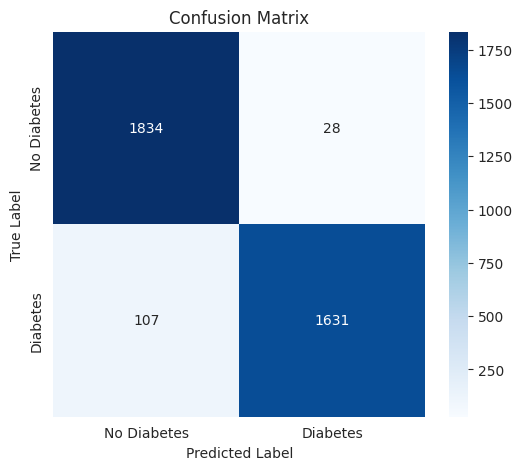

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


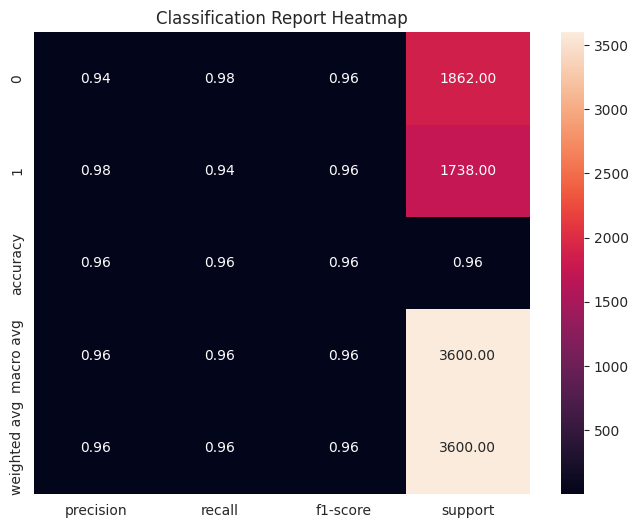

In [208]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report to DataFrame for visualization
report_df = pd.DataFrame(report).T

# Plot classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

In [209]:
pipeline.score(X_test,y_test)

0.9625

In [210]:
new_df.head(1)

,Age,HighBP,HighChol,Smoker,Sex,BMI,blood_glucose_level,Insulin,HbA1c_level,Diabetes_binary
0,65-69,Yes,Yes,Yes,Male,31.0,200.0,627.59032,5.7,Yes


In [211]:
preprocessor.fit_transform(new_df.head(5))

array([[2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 6.87500000e-01, 5.52238806e-01, 1.00000000e+00,
        0.00000000e+00],
       [4.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.06029185e-03,
        5.00000000e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 5.62500000e-01, 5.52238806e-01, 0.00000000e+00,
        1.66666667e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 4.37500000e-01, 1.00000000e+00, 6.34877246e-01,
        1.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.53731343e-01, 1.02220895e-02,
        4.44444444e-01]])

## Save Pipeline

In [212]:
import pickle

# Save the model to a file
with open('pipeline.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

print("Pipeline saved successfully!")


Pipeline saved successfully!


In [213]:
# Load the model from the file
with open('pipeline.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print("Model loaded successfully!")

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
print("Predictions:", y_pred)


Model loaded successfully!
Predictions: [0 0 0 ... 0 0 0]


In [140]:
X_test

,Age,HighBP,HighChol,Sex,BMI,blood_glucose_level,Smoker,HbA1c_level
980,75-79,Yes,No,Male,36,300,No,6.5
5157,50-54,No,Yes,Female,24,200,Yes,4.0
13381,80 or older,Yes,No,Male,28,145,Yes,6.5
11652,60-64,No,No,Male,28,200,No,6.0
2805,60-64,No,No,Female,24,200,No,6.0
...,...,...,...,...,...,...,...,...
14971,65-69,Yes,Yes,Female,28,140,Yes,4.0
10519,30-34,Yes,No,Female,37,100,Yes,6.6
12720,65-69,Yes,Yes,Female,23,100,No,5.7
17186,65-69,Yes,Yes,Male,37,300,Yes,5.7


In [141]:
X_test['HbA1c_level'].min()

3.5

In [144]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████| 8.91k/8.91k [00:00<00:00, 6.54MB/s]

Extracting files...
Path to dataset files: /home/junaid-ul-hassan/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [145]:
path

'/home/junaid-ul-hassan/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1'

In [147]:
pd.read_csv('/home/junaid-ul-hassan/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1/diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
